# Flight Price Detection

# Niladri Chand(12001481)

1. Introduction
2. Data Sourcing
3. Data Cleaning(if required)
4. Exploratory Data Analysis
    * ABC
    * DEF 
    * GHI

## 1. Introduction

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

## 2. Data Sourcing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("Clean_Dataset.csv")

In [23]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [24]:
data.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [26]:
data.shape

(300153, 12)

In [27]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Data Cleaning and Processing

- This dataset is almost clean with zero null values. It only has the column "Unnamed" which is not significant for the analysis. So we will drop the column.

In [28]:
##droping the unnamed column
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Data Analysis

In [29]:
data['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [30]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [31]:
data.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [32]:
df_grouped = data.groupby(['flight', 'airline'], as_index = False).count()
df_grouped.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

#### Indigo is the most popular airline in the country. Lets visualize !

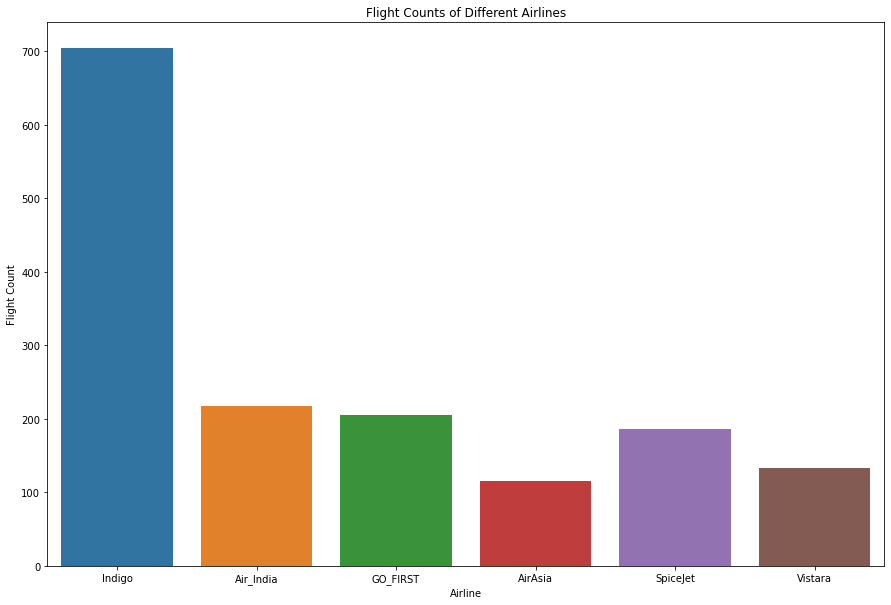

In [58]:
plt.figure(figsize = (15, 10))
sns.countplot(x = df_grouped.airline)
plt.title('Flight Counts of Different Airlines')
plt.xlabel("Airline")
plt.ylabel("Flight Count")
plt.show()

In [35]:
df_grouped2 = data.groupby(['flight', 'airline','class'], as_index = False).count()
df_grouped2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

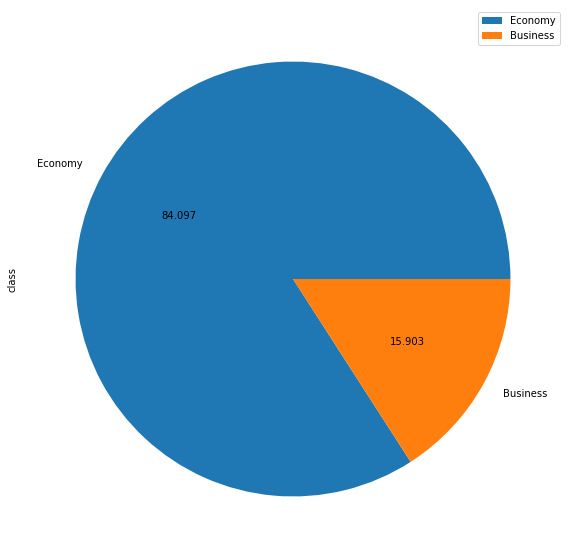

In [59]:
plt.figure(figsize = (15,10))
df_grouped2['class'].value_counts().plot(kind = 'pie', autopct = "%.3f")
plt.legend(['Economy','Business'])
plt.show()

##### Total number of flights from one city to another

In [77]:
data.groupby(['flight','source_city','destination_city','airline','class'], as_index = False).count().groupby(['source_city','destination_city'], as_index = False)['flight'].count().sort_values(by = ['flight'], ascending=False)

,source_city,destination_city,flight
14,Delhi,Mumbai,364
10,Delhi,Bangalore,310
13,Delhi,Kolkata,306
27,Mumbai,Delhi,282
11,Delhi,Chennai,258
29,Mumbai,Kolkata,240
25,Mumbai,Bangalore,228
1,Bangalore,Delhi,227
12,Delhi,Hyderabad,224
22,Kolkata,Delhi,185


##### Prices vary with airlines...? A boxplot can help us concluding that.

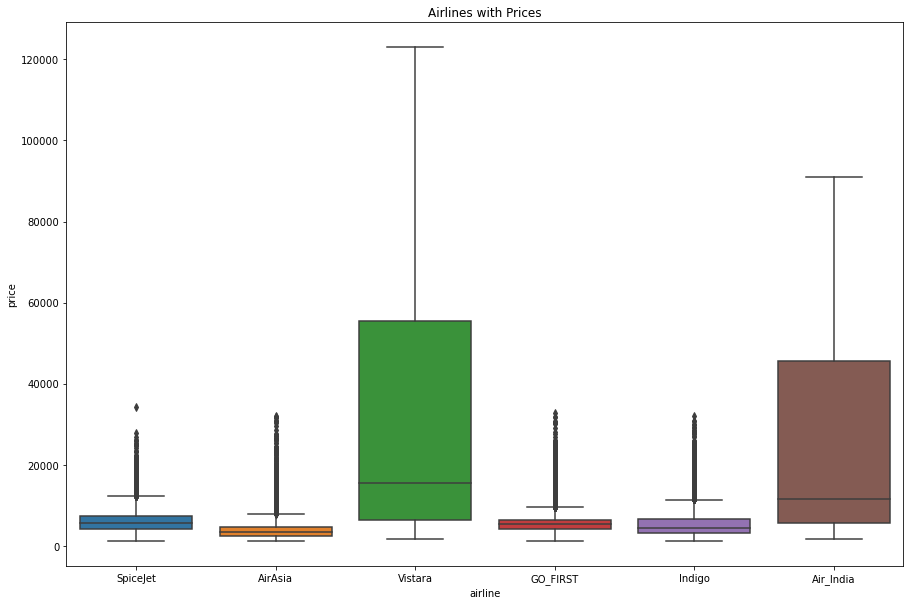

In [57]:
plt.figure(figsize = (15,10))
sns.boxplot(data=data, x="airline", y="price")
plt.title("Airlines with Prices")
plt.show()


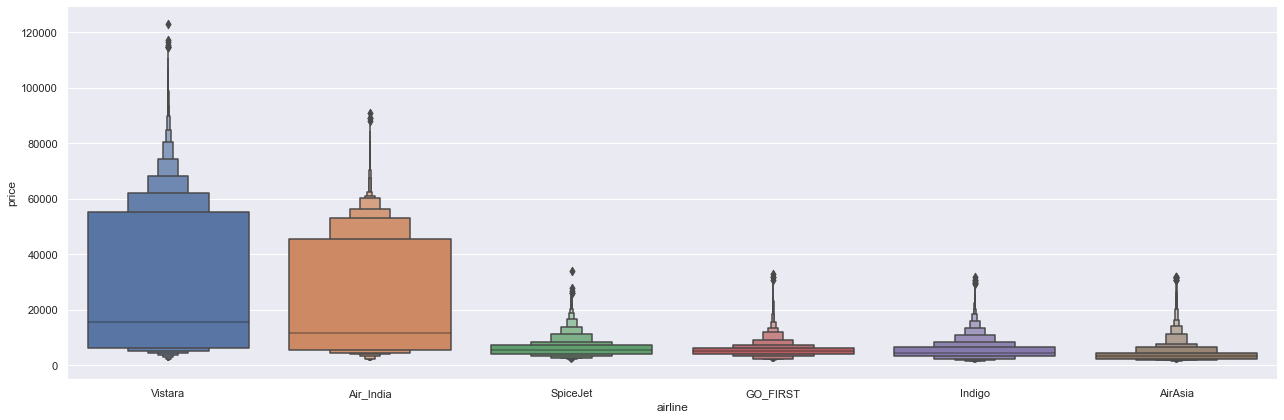

In [3]:
sns.set()
sns.catplot(y = "price", x = "airline", data = data.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

#### Vistara is the most expensive airline, Air India being at Second. Others are almost at par.

##### The prices of the flight tickets vary with the number of stops. Lets visualize..!

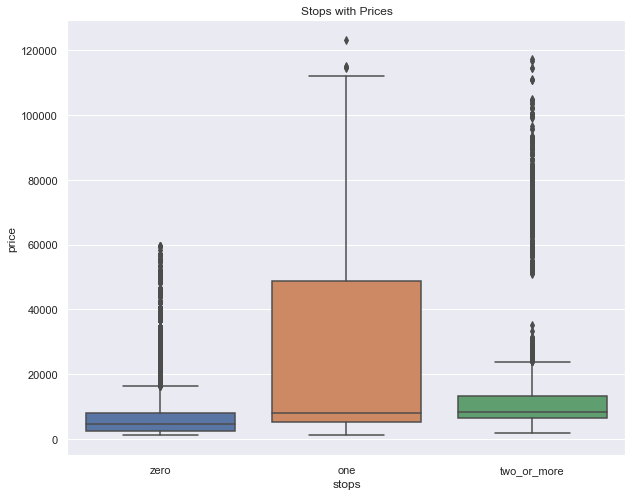

In [4]:
plt.figure(figsize = (10,8))
sns.boxplot(data=data, x="stops", y="price")
plt.title("Stops with Prices")
plt.show()


#### The flights with one stop are priced quite higher than the non-stop flights and flights with two or more stops.

##### How the ticket price vary between the classes? 

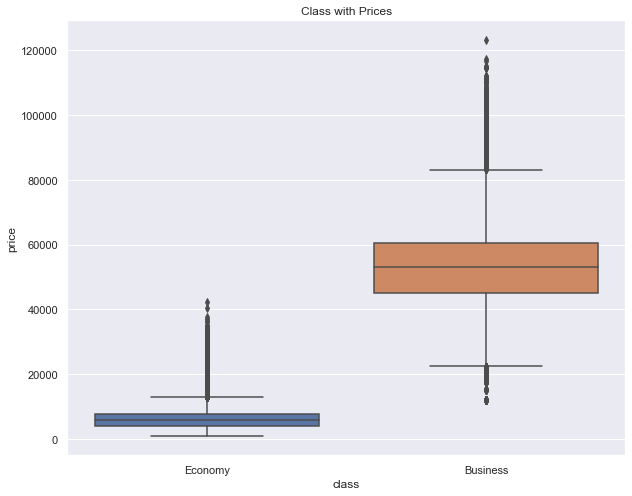

In [5]:
plt.figure(figsize = (10,8))
sns.boxplot(data=data, x="class", y="price")
plt.title("Class with Prices")
plt.show()

#### The price of the "Business Class" is almost three times that of the "Economy Class".

##### How the ticket price change based on the departure time and arrival time?

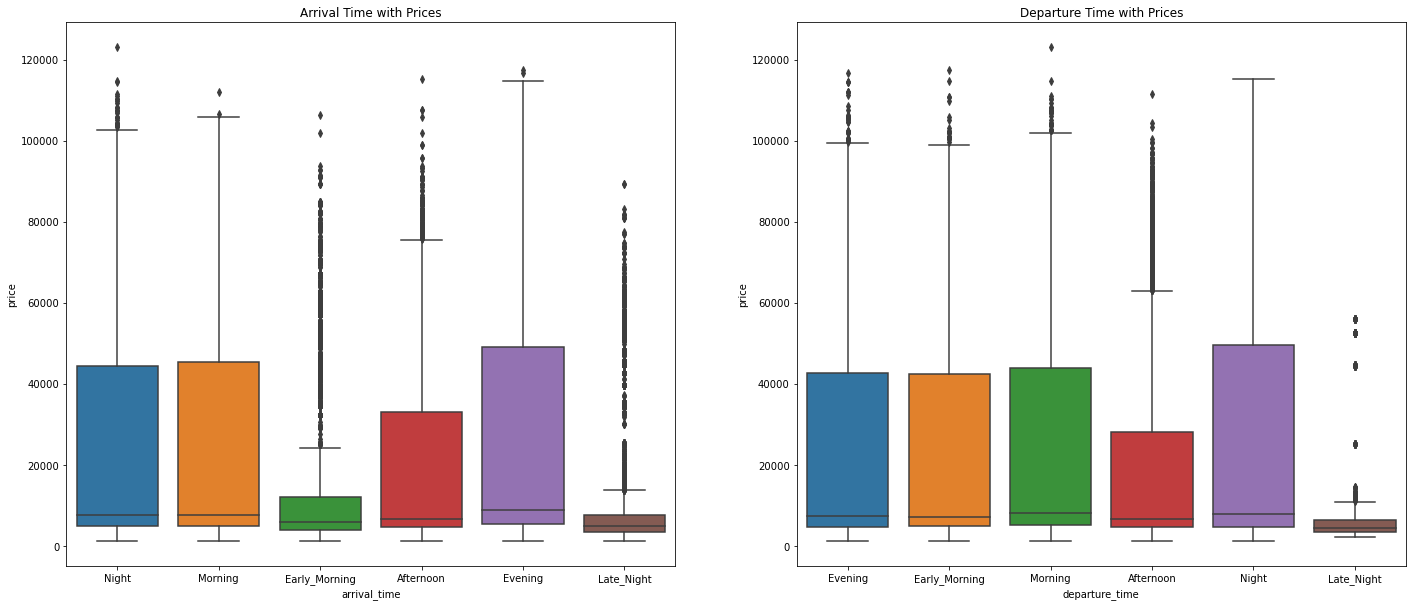

In [43]:
plt.figure(figsize = (24,10))
plt.subplot(1,2,1)
sns.boxplot(data=data, x="arrival_time", y="price")
plt.title("Arrival Time with Prices")
plt.subplot(1,2,2)
sns.boxplot(data=data, x="departure_time", y="price")
plt.title("Departure Time with Prices")
plt.show()

### We can say that the price in the evening is highest and for departure, flights at night have high prices comparatively

##### How the price changes with change in source city and Destination city?

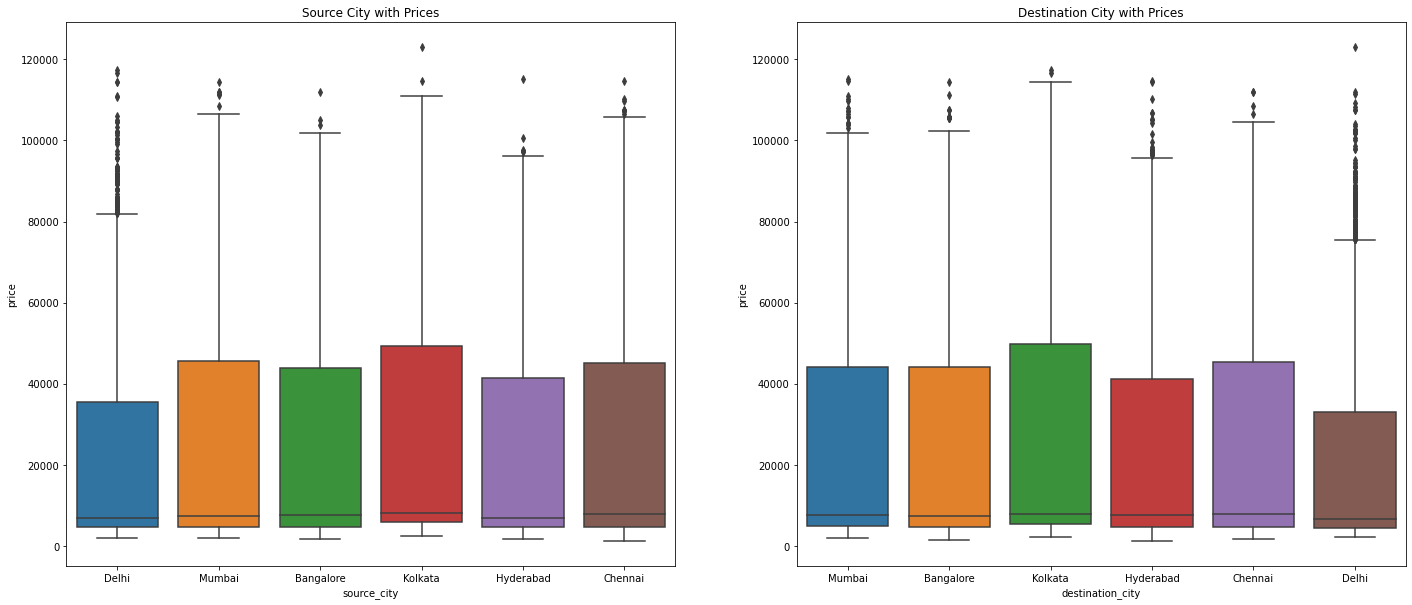

In [44]:
plt.figure(figsize = (24,10))
plt.subplot(1,2,1)
sns.boxplot(data=data, x="source_city", y="price")
plt.title("Source City with Prices")
plt.subplot(1,2,2)
sns.boxplot(data=data, x="destination_city", y="price")
plt.title("Destination City with Prices")
plt.show()


##### How the price varies with the flight duration based on class?

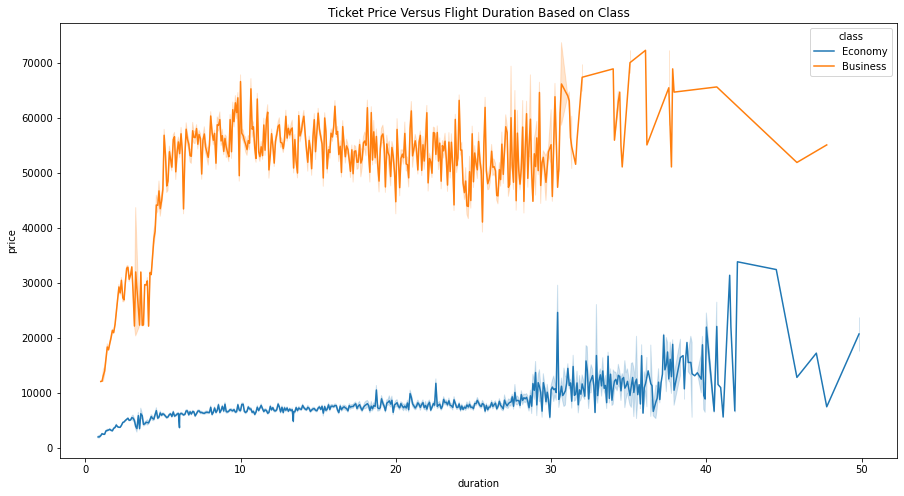

In [83]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = data, x = 'duration', y= 'price', hue = 'class')
plt.title('Ticket Price Versus Flight Duration Based on Class')
plt.show()

### It isn clear that 100% of the economy class lie below Rs. 30,000 while 90% of the business class is above Rs. 30,000.

##### How is the price affected on the days left for departure?

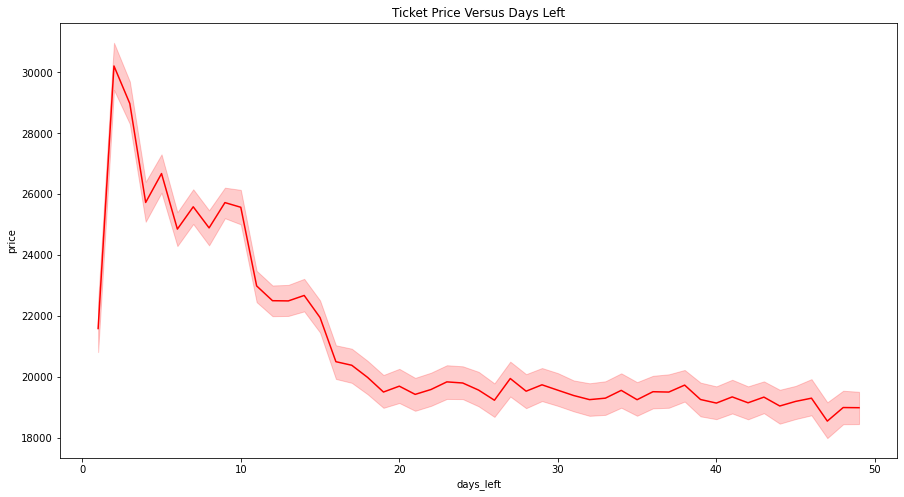

In [5]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = data, x = 'days_left', y= 'price',color='red')
plt.title('Ticket Price Versus Days Left')
plt.show()

##### The combined study !

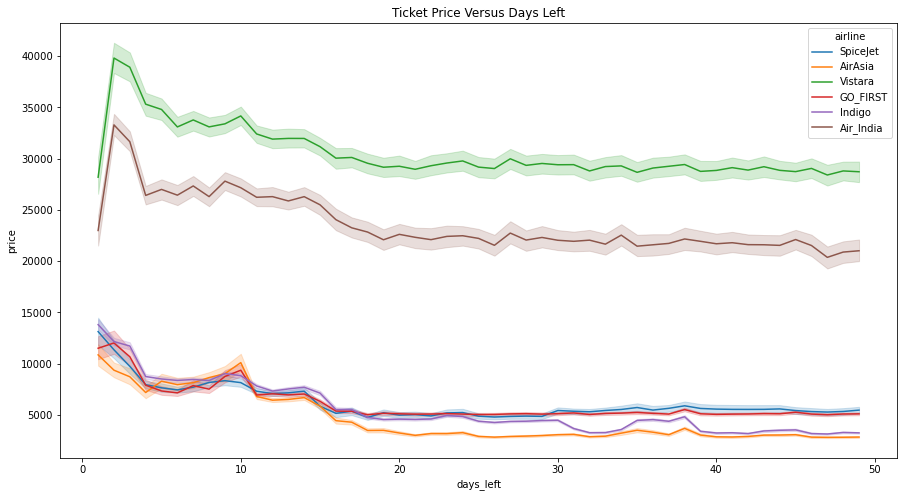

In [7]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = data, x = 'days_left', y= 'price', hue = 'airline')
plt.title('Ticket Price Versus Days Left')
plt.show()

##### Total number of flights from one city to another

In [85]:
data.groupby(['flight','source_city','destination_city','airline','class'], as_index = False).count().groupby(['source_city','destination_city'], as_index = False)['flight'].count().sort_values(by = ['flight'], ascending=False)

,source_city,destination_city,flight
14,Delhi,Mumbai,364
10,Delhi,Bangalore,310
13,Delhi,Kolkata,306
27,Mumbai,Delhi,282
11,Delhi,Chennai,258
29,Mumbai,Kolkata,240
25,Mumbai,Bangalore,228
1,Bangalore,Delhi,227
12,Delhi,Hyderabad,224
22,Kolkata,Delhi,185


### The maximum flights run between Delhi and Mumbai, while the minimum number of flights is in the route Chennai to Bangalore.

##### Average price of different airlines from source city to destination city

In [90]:
data.groupby(['airline','source_city','destination_city'], as_index = False)['price'].mean()


,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
...,...,...,...,...
172,Vistara,Mumbai,Bangalore,35029.880315
173,Vistara,Mumbai,Chennai,32181.946251
174,Vistara,Mumbai,Delhi,26402.695114
175,Vistara,Mumbai,Hyderabad,29497.578017
